Simple Linear Regression Project:
1.Divide the features based on independent and dependent features
2.Train test split
3.Standardization of data
4.Train the model using Linear Regression

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
#divide into dependent(X) and independent(X) features
X=df[["Weight"]]
Y=df["Height"]

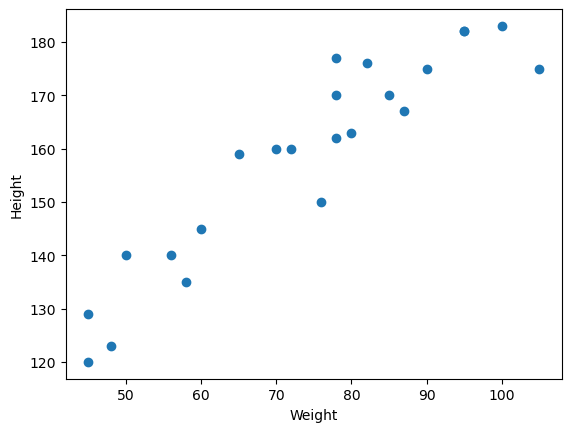

In [7]:
plt.scatter(X,Y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)#20% data as test data and random_state means split will always same

In [9]:
X_train.shape

(18, 1)

In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)#fit:calculate mean,standard dev for x_train
X_test=scaler.transform(X_test)

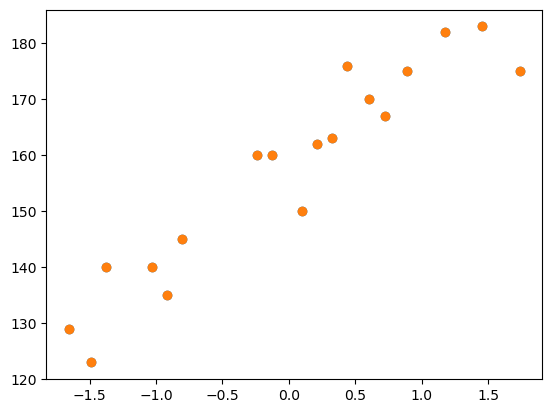

In [12]:
plt.scatter(X_train,Y_train)
plt.show()

In [13]:
#Train the simple linear regression model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [16]:
print("Coeffiecint or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coeffiecint or slope: [17.03440872]
Intercept: 157.5


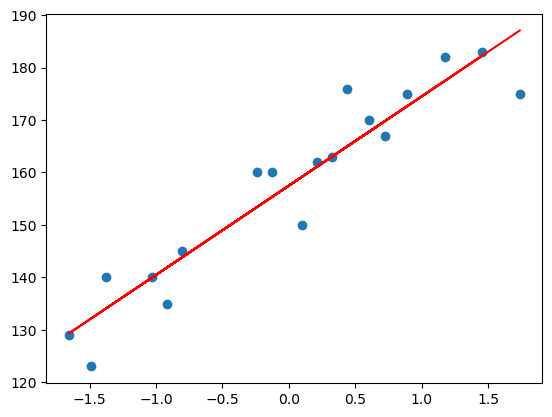

In [24]:
plt.scatter(X_train,Y_train)
#plot the best fit line
plt.plot(X_train,regression.predict(X_train),'r')
plt.show()

##Prediction of train data:
1.predicted height output=intercept+coeff_(weights)
2.y_pred_train=157.5+17.03(X_train)

##Prediction of test data :
1.predicted height output=intercept+coeff_(weights)
2.y_pred_test=157.5+17.03(X_test)

In [25]:
Y_pred_test=regression.predict(X_test)

In [26]:
Y_pred_test,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

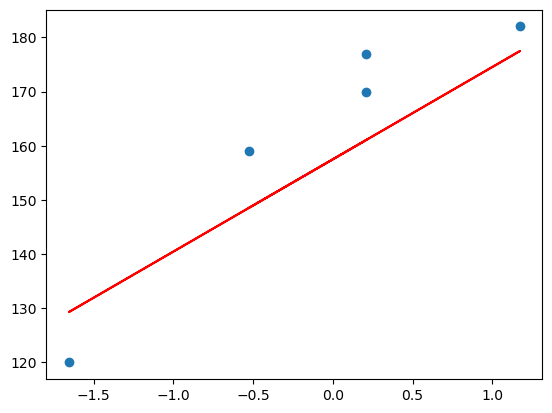

In [ ]:
#prediction for the test data
plt.scatter(X_test,Y_test)
#plot the best fit line
plt.plot(X_test,regression.predict(X_test),'r')
plt.show()

Performance Metrics

MSE,MAE,RMSE
R Square 


In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred_test)
print("mean squared error:",mse)

mean squared error: 109.77592599051654


In [30]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,Y_pred_test)
print("mean absolute error:",mae)

mean absolute error: 9.822657814519227


In [31]:
rmse=np.sqrt(mse)
print("root mean squared error:",rmse)

root mean squared error: 10.477400726827076


In [32]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred_test)
print("R2 score:",score)

R2 score: 0.7769869860423441


In [34]:
#new data point weight is 80 give prediction for it
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [36]:
print("Predicted height for new weight point:",regression.predict(scaled_weight))

Predicted height for new weight point: [163.01076266]


In [37]:
##Residuals
residuals=Y_test-Y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10104\1976647422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


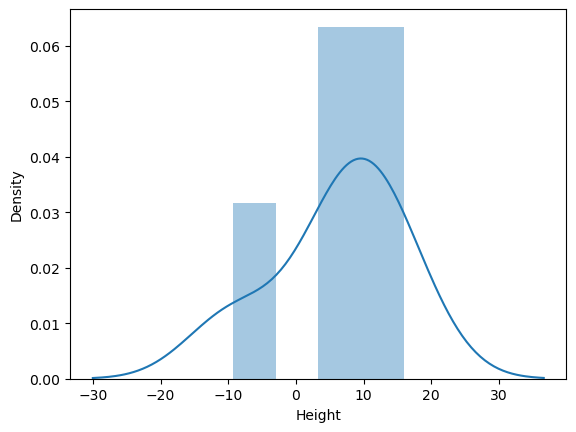

In [ ]:
import seaborn as sns
sns.distplot(residuals,kde=True)
plt.show()#should be normally distributed
